In [19]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import make_interp_spline
import pandas as pd

lin_eboss = pd.read_csv('lines_eboss.txt',delim_whitespace=True, skiprows=0)
lin_desi = pd.read_csv('lines_desi.txt',delim_whitespace=True, skiprows=0)

interv_e = np.array(lin_eboss['lambda_max'])-np.array(lin_eboss['lambda_min'])
lin_eboss['interval'] = interv_e
center_e = np.array(lin_eboss['lambda_min']) + np.array(lin_eboss['interval'])/2
lin_eboss['center'] = center_e

interv_d = np.array(lin_desi['lambda_max'])-np.array(lin_desi['lambda_min'])
lin_desi['interval'] = interv_d
center_d = np.array(lin_desi['lambda_min']) + np.array(lin_desi['interval'])/2
lin_desi['center'] = center_d



lin_eboss

,name,lambda_min,lambda_max,CHAR,interval,center
0,absorption_K,3931.0,3937.0,OBS,6.0,3934.00
1,absorption_H,3966.0,3972.0,OBS,6.0,3969.00
2,sky_lines,4042.0,4054.0,OBS,12.0,4048.00
3,sky_lines,4355.0,4365.0,OBS,10.0,4360.00
4,sky_lines,5455.0,5467.0,OBS,12.0,5461.00
5,sky_lines_OI,5573.0,5585.0,OBS,12.0,5579.00
6,sky_lines,5682.0,5695.0,OBS,13.0,5688.50
7,sky_lines,5811.0,5815.0,OBS,4.0,5813.00
8,sky_lines,5865.0,5873.0,OBS,8.0,5869.00
9,absorption_NaD,5885.0,5902.0,OBS,17.0,5893.50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


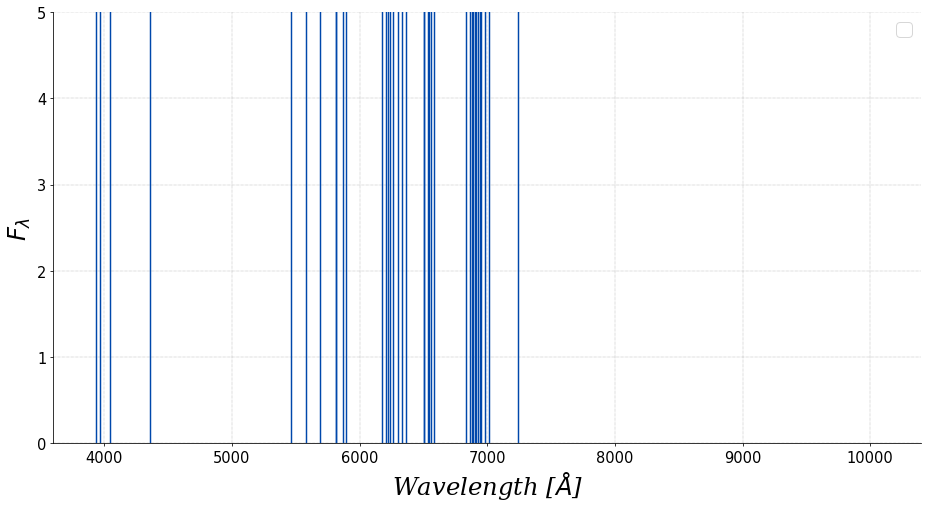

In [56]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

lw_fl = 1
lc_fl = '#0047AB'
a_fl = 1
lb_lines = [0.22,0.27]

plt.figure(figsize=(16,8),dpi=70)

for x in range(len(lin_eboss)):
    plt.axvline(lin_eboss['center'][x],ymin =0.0,ymax= 1.0, c=lc_fl, alpha=a_fl, 
                linewidth = 1.5)   
    
plt.ylabel(r"$F_{\lambda}$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3600,10400)
plt.ylim(0,5)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#98FB98'

plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


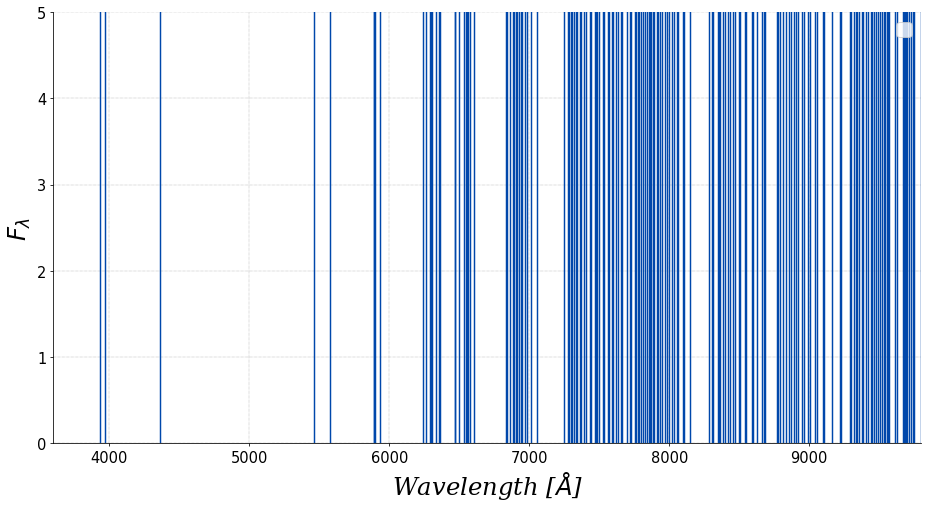

In [54]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

lw_fl = 1
lc_fl = '#0047AB'
a_fl = 1
lb_lines = [0.22,0.27]

plt.figure(figsize=(16,8),dpi=70)

for x in range(len(lin_desi)):
    plt.axvline(lin_desi['center'][x],ymin =0.0,ymax= 1.0, c=lc_fl, alpha=a_fl, 
                linewidth = 1.5)

#r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$"    
    
plt.ylabel(r"$F_{\lambda}$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3600,9800)
plt.ylim(0,5)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#F4F1BB'

plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()

In [58]:
27074+153769

180843